In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [16]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

In [4]:
caminho = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'

passageiros = pd.read_csv(caminho)

In [5]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

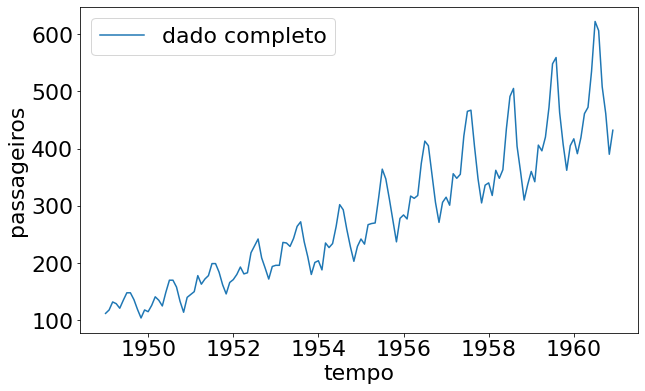

In [18]:
sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros, label = 'dado completo')

In [27]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [21]:
sc = StandardScaler()

In [22]:
sc.fit(passageiros)

StandardScaler()

In [23]:
dado_escalado = sc.transform(passageiros)

In [25]:
x = dado_escalado[:, 0]
y = dado_escalado[:, 1]

Text(0.5, 0, 'Data')

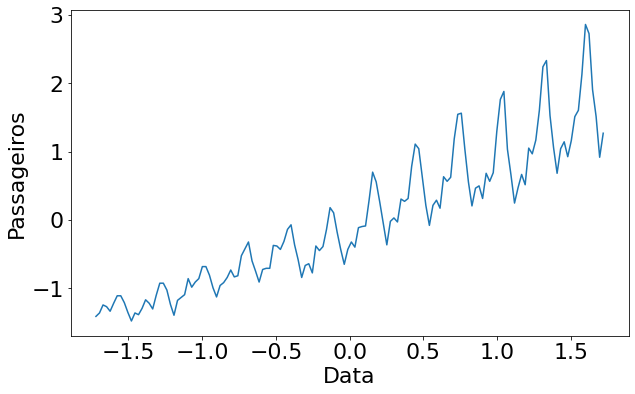

In [28]:
sns.lineplot(x = x, y = y)
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [30]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [31]:
x_treino = x[0: tamanho_treino]
y_treino = y[0: tamanho_treino]

In [32]:
x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

<AxesSubplot:>

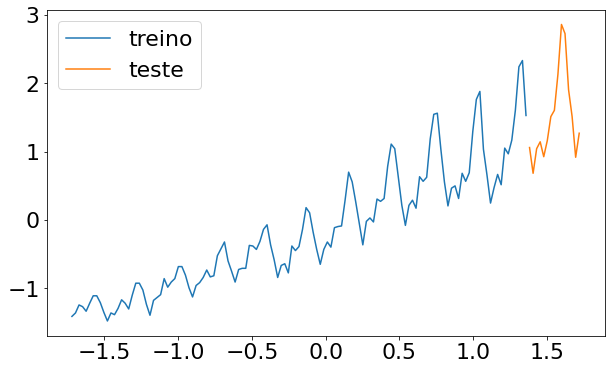

In [36]:
sns.lineplot(x = x_treino, y=y_treino, label = 'treino')
sns.lineplot(x = x_teste,  y=y_teste, label  = 'teste')

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [65]:
regressor = Sequential()

In [66]:
regressor.add(Dense(1, 
                    input_dim = 1,
                    kernel_initializer = 'Ones',
                    use_bias = False,
                    activation = 'linear'))

In [67]:
regressor.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [68]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [69]:
regressor.fit(x_treino, y_treino)

5/5 [==============================] - 1s 3ms/step - loss: 0.1285


In [70]:
y_predict = regressor.predict(x_treino)

<AxesSubplot:>

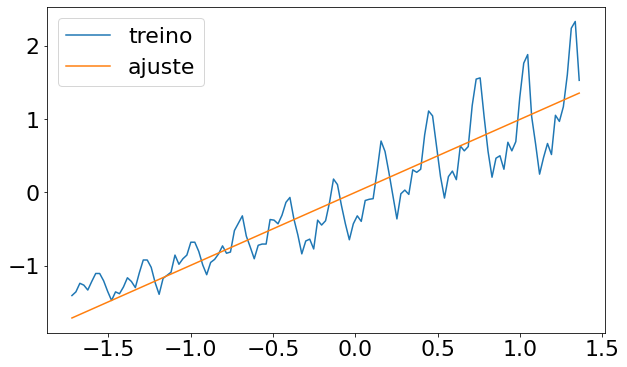

In [71]:
sns.lineplot(x = x_treino, y=y_treino, label = 'treino')
sns.lineplot(x = x_treino, y=y_predict[:, 0], label = 'ajuste')

### Mudança de escala 

In [73]:
d =  {'tempo': x_treino,
  'pasageiros': y_predict[:, 0]}

In [76]:
resultados = pd.DataFrame(d)

In [78]:
resultado_trainsf = sc.inverse_transform(resultados)

In [80]:
resultado_trainsf = pd.DataFrame(resultado_trainsf)
resultado_trainsf.columns = ['tempo', 'passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

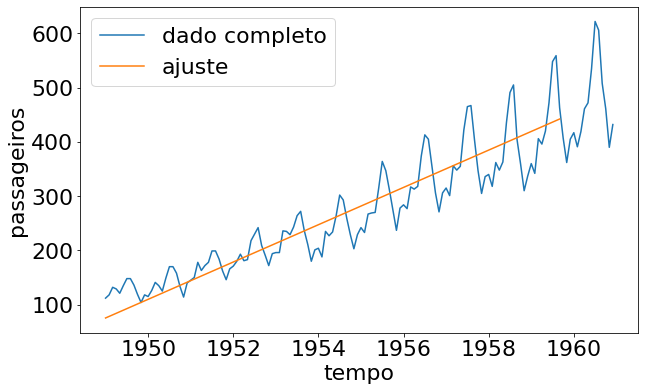

In [81]:
sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros, label = 'dado completo')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultado_trainsf, label = 'ajuste')

In [82]:
y_predict_teste = regressor.predict(x_teste)

In [83]:
d =  {'tempo': x_teste,
  'pasageiros': y_predict_teste[:, 0]}

In [86]:
resultados_teste = pd.DataFrame(d)

In [87]:
resultado_trainsf_teste = sc.inverse_transform(resultados_teste)

In [88]:
resultado_trainsf_teste = pd.DataFrame(resultado_trainsf_teste)
resultado_trainsf_teste.columns = ['tempo', 'passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

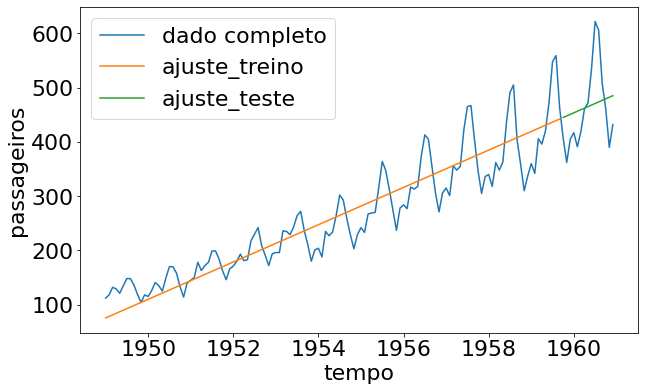

In [91]:
sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros, label = 'dado completo')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultado_trainsf, label = 'ajuste_treino')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultado_trainsf_teste, label = 'ajuste_teste')

### adicionar mais camadas

In [107]:
regressor2 = Sequential()

In [108]:
regressor2.add(Dense(8, 
                     input_dim = 1,
                     kernel_initializer = 'random_uniform',
                     activation = 'sigmoid', 
                     use_bias = False))


regressor2.add(Dense(8,
                     kernel_initializer = 'random_uniform',
                     activation = 'sigmoid', 
                     use_bias = False))

regressor2.add(Dense(1,
                     kernel_initializer = 'random_uniform',
                     activation = 'linear', 
                     use_bias = False))

In [109]:
regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [110]:
regressor2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 8         
                                                                 
 dense_15 (Dense)            (None, 8)                 64        
                                                                 
 dense_16 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [116]:
regressor2.fit(x_treino, y_treino, epochs = 500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6881
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6873
Epoch 3/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6867
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6862
Epoch 5/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6866
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6861
Epoch 7/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6861
Epoch 8/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6856
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6840
Epoch 10/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6827
Epoch 11/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6817
Epoch 12/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6814
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

5/5 [==============================] - 0s 3ms/step - loss: 0.5590
Epoch 105/500
5/5 [==============================] - 0s 3ms/step - loss: 0.5577
Epoch 106/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5568
Epoch 107/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5553
Epoch 108/500
5/5 [==============================] - 0s 3ms/step - loss: 0.5529
Epoch 109/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5504
Epoch 110/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5480
Epoch 111/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5458
Epoch 112/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5441
Epoch 113/500
5/5 [==============================] - 0s 3ms/step - loss: 0.5425
Epoch 114/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5411
Epoch 115/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5393
Epoch 116/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 3ms/step - loss: 0.4016
Epoch 207/500
5/5 [==============================] - 0s 3ms/step - loss: 0.4004
Epoch 208/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3994
Epoch 209/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3984
Epoch 210/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3971
Epoch 211/500
5/5 [==============================] - 0s 4ms/step - loss: 0.3958
Epoch 212/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3946
Epoch 213/500
5/5 [==============================] - 0s 4ms/step - loss: 0.3931
Epoch 214/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3917
Epoch 215/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3906
Epoch 216/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3894
Epoch 217/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3880
Epoch 218/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 3ms/step - loss: 0.2864
Epoch 309/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 310/500
5/5 [==============================] - 0s 7ms/step - loss: 0.2847
Epoch 311/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2832
Epoch 312/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2817
Epoch 313/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2806
Epoch 314/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2800
Epoch 315/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2790
Epoch 316/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2781
Epoch 317/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2777
Epoch 318/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2768
Epoch 319/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2758
Epoch 320/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 4ms/step - loss: 0.2170
Epoch 411/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2165
Epoch 412/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2161
Epoch 413/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2157
Epoch 414/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2154
Epoch 415/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2150
Epoch 416/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2146
Epoch 417/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2143
Epoch 418/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2140
Epoch 419/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2136
Epoch 420/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2131
Epoch 421/500
5/5 [==============================] - ETA: 0s - loss: 0.143 - 0s 4ms/step - loss: 0.2124
Epoch 422/500
5/5 [===========

In [117]:
y_predict = regressor2.predict(x_treino)

In [118]:
y_predict_teste = regressor2.predict(x_teste)

<AxesSubplot:>

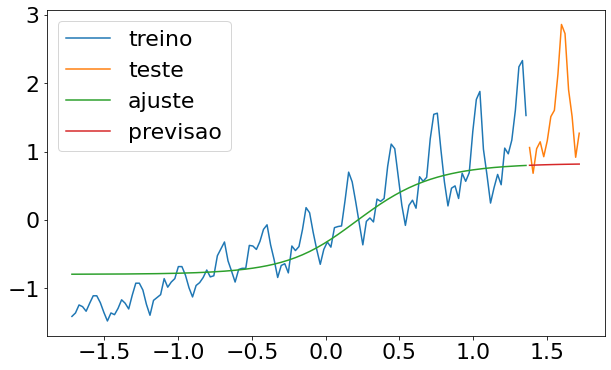

In [119]:
sns.lineplot(x = x_treino, y=y_treino,              label = 'treino')
sns.lineplot(x = x_teste,  y=y_teste,              label = 'teste')
sns.lineplot(x = x_treino, y=y_predict[:, 0],       label = 'ajuste')
sns.lineplot(x = x_teste,  y=y_predict_teste[:, 0], label = 'previsao')

### Atraso passageiros

In [120]:
def separa_dados(vetor, n_passos):
    x_novo, y_novo = [], []
    
    
    for i in range(n_passos, vetor.shape[0]):
        x_novo.append(list(vetor.loc[i-n_passos:i- 1]))
        y_novo.append(vetor.loc[i])
        
    x_novo, y_novo = np.array(x_novo), np.array(y_novo)
    
    return x_novo, y_novo

In [121]:
vetor = pd.DataFrame(y_treino)[0]
vetor

0     -1.407779
1     -1.357590
2     -1.240483
3     -1.265578
4     -1.332496
         ...   
124    1.168570
125    1.603538
126    2.239260
127    2.331272
128    1.528255
Name: 0, Length: 129, dtype: float64

In [138]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [140]:
vetor2 = pd.DataFrame(y_teste)[0]
vetor2

0     1.059828
1     0.683413
2     1.043098
3     1.143475
4     0.925991
5     1.160205
6     1.511525
7     1.603538
8     2.130518
9     2.858253
10    2.724417
11    1.904669
12    1.511525
13    0.917627
14    1.268947
Name: 0, dtype: float64

In [141]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

In [143]:
regressor3 = Sequential()

In [145]:
regressor3.add(Dense(8, 
                     input_dim = 1,
                     kernel_initializer = 'ones',
                     activation = 'linear', 
                     use_bias = False))


regressor3.add(Dense(64,
                     kernel_initializer = 'random_uniform',
                     activation = 'sigmoid', 
                     use_bias = False))

regressor3.add(Dense(1,
                     kernel_initializer = 'random_uniform',
                     activation = 'linear', 
                     use_bias = False))

In [146]:
regressor3.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [148]:
regressor3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 8)                 8         
                                                                 
 dense_18 (Dense)            (None, 64)                512       
                                                                 
 dense_19 (Dense)            (None, 1)                 64        
                                                                 
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [149]:
regressor3.fit(x_treino_novo, y_treino_novo, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.7957
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7556
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7315
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7143
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6921
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6673
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6422
Epoch 8/100
4/4 [==============================] - ETA: 0s - loss: 0.426 - 0s 5ms/step - loss: 0.6101
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5822
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5484
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5129
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4759
Epoch 13/100
4/4 [===================

In [154]:
y_predict_novo = regressor3.predict(x_treino_novo)

<AxesSubplot:xlabel='tempo', ylabel='0'>

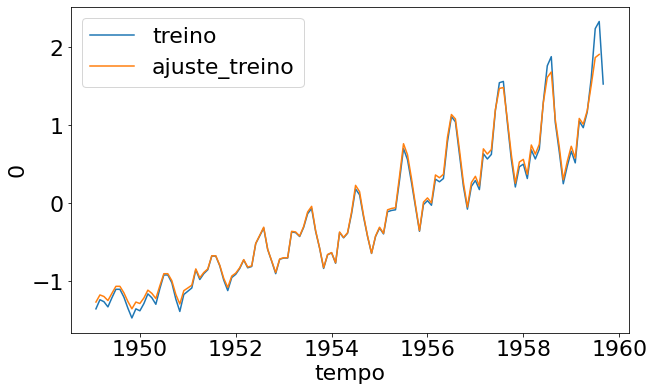

In [156]:
sns.lineplot(x = 'tempo', y = y_treino_novo, data = passageiros[1:129], label = 'treino')
sns.lineplot(x = 'tempo', y =  pd.DataFrame(y_predict_novo)[0] , data = passageiros[1:129], label = 'ajuste_treino')

In [163]:
y_predict_teste_novo = regressor3.predict(x_teste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

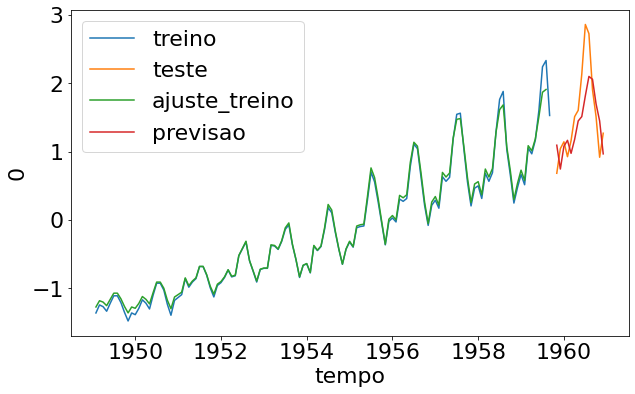

In [167]:
sns.lineplot(x = 'tempo', y = y_treino_novo, data = passageiros[1:129], label = 'treino')
sns.lineplot(x = 'tempo', y =  y_teste_novo , data = passageiros[130:144], label = 'teste')
sns.lineplot(x = 'tempo', y =  pd.DataFrame(y_predict_novo)[0] , data = passageiros[1:129], label = 'ajuste_treino')
sns.lineplot(x = 'tempo', y =  resultado.values, data = passageiros[130:144], label = 'previsao')